# For testing the speed and functionality of my plotting functions

In [1]:
%load_ext autoreload
%autoreload 1

import sys
HOME='/mnt/home/llorente/'
HOME='/home/cj/'
sys.path.append(HOME+'comp_structure_research')
sys.path.append(HOME+'comp_structure_research/stellar_mass_fraction')

In [2]:
%aimport HaloData
from HaloData import HaloData

dataset_fname  = "~/cosmo_bigbox/25Mpc_512/RD0111/RD0111"
halo_dat_fname = "halodata_RD0265.dat.bkp"
hd = HaloData.load_from_file(halo_dat_fname)

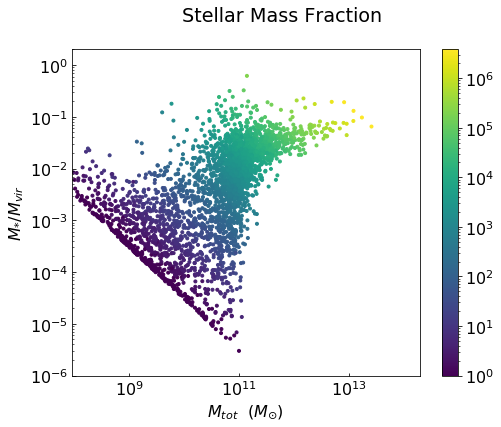

In [3]:
%aimport stellar_mass_fraction_plots
from stellar_mass_fraction_plots import *
stellar_mass_fraction_scatter(hd)

# Speedtesting filters

elapsed time: 0.13072896003723145 s


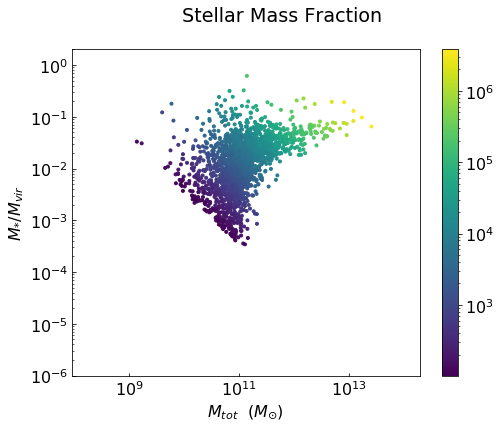

In [4]:
%aimport stellar_mass_fraction_plots
from stellar_mass_fraction_plots import *
from time import time

greater_than = lambda x, y: x > y
less_than = lambda x, y: x < y

start = time()
filtered = hd.filter_by(Fields.TOT_MASS, greater_than, 1e9 ).filter_by(Fields.NUM_STAR_PARTICLES, greater_than, 100 )
elapsed = time() - start

print(f"elapsed time: {elapsed} s")

stellar_mass_fraction_scatter(filtered)

elapsed time: 0.36530303955078125 s


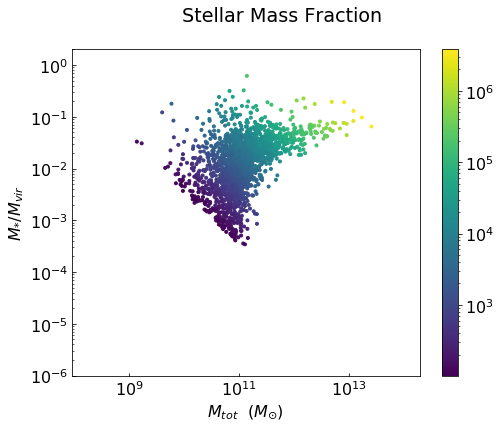

In [5]:
%aimport HaloData
from HaloData import *
%aimport stellar_mass_fraction_plots
from stellar_mass_fraction_plots import *

from time import time
# cache the function
trash = hd.fast_filter_by(Fields.TOT_MASS, 1e9 )

start = time()
filtered = hd.fast_filter_by(Fields.TOT_MASS, 1e9 ).fast_filter_by(Fields.NUM_STAR_PARTICLES, 100 )
elapsed = time() - start

print(f"elapsed time: {elapsed} s")

stellar_mass_fraction_scatter(filtered)

Numba didn't outperfom the basic filter